## Set-up

In [2]:
%run functions.ipynb
%matplotlib inline

In [3]:
import tweepy
import configparser
import os
import json
import GetOldTweets3 as got
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import csv
import math

from collections import Counter

In [5]:
jan_tweets = load_tweets('data/1/tweets_2020-01-01_to_2020-02-01.json')
feb_tweets = load_tweets('data/2/tweets_2020-02-01_to_2020-03-01.json')
mar_tweets = load_tweets('data/3/tweets_2020-03-01_to_2020-04-01.json')
apr_tweets = load_tweets('data/4/tweets_2020-04-01_to_2020-05-01.json')
all_time = load_tweets('data/all_time/tweets_2020-01-01_to_2020-05-01.json')
trump_tweets = load_tweets('data/all_time/realdonaldtrump_2020-01-01_to_2020-05-01.json')
pompeo_tweets = load_tweets('data/all_time/secpompeo_2020-01-01_to_2020-05-01.json')
racist_tweets = load_tweets('data/all_time/racist_tweets_2020-01-01_to_2020-05-01.json')

In [6]:
corpus1 = json.load(open('data/corpus_index1.json'))
corpus2 = json.load(open('data/corpus_index2.json'))
corpus3 = json.load(open('data/corpus_index3.json'))
corpus4 = json.load(open('data/corpus_index4.json'))
corp_all = json.load(open('data/corpus_index_all.json'))

## News articles: bigram and trigrams over time

#### January

In [5]:
jan_word_dist=Counter()
jan_bigram_dist=Counter()
jan_trigram_dist=Counter()

for article in corpus1:
    filename = article['Filename']
    text = open('data/text1/{}'.format(filename)).read()
    article['text'] = text
    
    jan_tokens = tokenize(article['text'], lowercase=True, strip_chars=string.punctuation)
    
    article['tokens'] = jan_tokens 
    article['token_cnt'] = len(jan_tokens)
    article['type_cnt'] = len(set(jan_tokens))
    
    jan_tokens = article['tokens']
    jan_bigrams=get_ngram_tokens(jan_tokens,2)
    jan_trigrams=get_ngram_tokens(jan_tokens,3)
    
    jan_word_dist.update(jan_tokens)
    jan_bigram_dist.update(jan_bigrams)
    jan_trigram_dist.update(jan_trigrams)

In [6]:
top_20_bigrams = jan_bigram_dist.most_common(20)
top_20_trigrams = jan_trigram_dist.most_common(20)
bigram_list = list(pd.DataFrame(top_20_bigrams, columns = ['Bigram','Freq'])['Bigram'])
trigram_list = list(pd.DataFrame(top_20_trigrams, columns = ['Trigram','Freq'])['Trigram'])

In [7]:
rank = list(range(1, 21))
jan_article_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
jan_article_bitrigram['Bigram']=bigram_list
jan_article_bitrigram['Trigram']=trigram_list
jan_article_bitrigram.set_index('Rank', inplace=True)

In [8]:
jan_article_bitrigram

,Bigram,Trigram
Rank,,
1,of the,the united states
2,in the,in the united
3,to the,university of california
4,the chinese,the chinese diaspora
5,the united,i dont care
6,united states,the university of
7,the world,the spread of
8,that the,china and the
9,and the,and the united


#### February

In [9]:
feb_word_dist=Counter()
feb_bigram_dist=Counter()
feb_trigram_dist=Counter()
feb_all_tokens = []
for article in corpus2:
    filename = article['Filename']
    text = open('data/text2/{}'.format(filename)).read()
    article['text'] = text
    
    feb_tokens = tokenize(article['text'], lowercase=True, strip_chars=string.punctuation)
    feb_all_tokens.extend(feb_tokens)
    
    article['tokens'] = feb_tokens 
    article['token_cnt'] = len(feb_tokens)
    article['type_cnt'] = len(set(feb_tokens))
    
    feb_tokens = article['tokens']
    feb_bigrams=get_ngram_tokens(feb_tokens,2)
    feb_trigrams=get_ngram_tokens(feb_tokens,3)
    
    feb_word_dist.update(feb_tokens)
    feb_bigram_dist.update(feb_bigrams)
    feb_trigram_dist.update(feb_trigrams)

In [10]:
article_feb_top_20_bigrams = feb_bigram_dist.most_common(20)
article_feb_top_20_trigrams = feb_trigram_dist.most_common(20)
article_bigram_list = list(pd.DataFrame(article_feb_top_20_bigrams, columns = ['Bigram','Freq'])['Bigram'])
article_trigram_list = list(pd.DataFrame(article_feb_top_20_trigrams, columns = ['Trigram','Freq'])['Trigram'])

In [11]:
rank = list(range(1, 21))
feb_article_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
feb_article_bitrigram['Bigram']=article_bigram_list
feb_article_bitrigram['Trigram']=article_trigram_list
feb_article_bitrigram.set_index('Rank', inplace=True)

In [12]:
feb_article_bitrigram 

,Bigram,Trigram
Rank,,
1,of the,cwu federal credit
2,in the,federal credit union
3,to the,source company website
4,the virus,the united states
5,the coronavirus,the novel coronavirus
6,to be,of the virus
7,for the,board of trustees
8,will be,central washington university
9,from the,of the coronavirus


#### March

In [13]:
mar_word_dist=Counter()
mar_bigram_dist=Counter()
mar_trigram_dist=Counter()

for article in corpus3:
    filename = article['Filename']
    text = open('data/text3/{}'.format(filename)).read()
    article['text'] = text
    
    mar_tokens = tokenize(article['text'], lowercase=True, strip_chars=string.punctuation)
    
    article['tokens'] = mar_tokens 
    article['token_cnt'] = len(mar_tokens)
    article['type_cnt'] = len(set(mar_tokens))
    
    mar_tokens = article['tokens']
    mar_bigrams=get_ngram_tokens(mar_tokens,2)
    mar_trigrams=get_ngram_tokens(mar_tokens,3)
    
    mar_word_dist.update(mar_tokens)
    mar_bigram_dist.update(mar_bigrams)
    mar_trigram_dist.update(mar_trigrams)

In [14]:
top_20_bigrams = mar_bigram_dist.most_common(20)
top_20_trigrams = mar_trigram_dist.most_common(20)
bigram_list = list(pd.DataFrame(top_20_bigrams, columns = ['Bigram','Freq'])['Bigram'])
trigram_list = list(pd.DataFrame(top_20_trigrams, columns = ['Trigram','Freq'])['Trigram'])

In [15]:
rank = list(range(1, 21))
mar_article_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
mar_article_bitrigram['Bigram']=bigram_list
mar_article_bitrigram['Trigram']=trigram_list
mar_article_bitrigram.set_index('Rank', inplace=True)

In [16]:
mar_article_bitrigram

,Bigram,Trigram
Rank,,
1,of the,the united states
2,in the,the chinese virus
3,to the,in the united
4,the virus,of the virus
5,the coronavirus,the spread of
6,on the,president donald trump
7,for the,in the us
8,to be,the world health
9,the chinese,of the coronavirus


#### April

In [17]:
apr_word_dist=Counter()
apr_bigram_dist=Counter()
apr_trigram_dist=Counter()

for article in corpus4:
    filename = article['Filename']
    text = open('data/text4/{}'.format(filename)).read()
    article['text'] = text
    
    apr_tokens = tokenize(article['text'], lowercase=True, strip_chars=string.punctuation)
    
    article['tokens'] = apr_tokens 
    article['token_cnt'] = len(apr_tokens)
    article['type_cnt'] = len(set(apr_tokens))
    
    apr_tokens = article['tokens']
    apr_bigrams=get_ngram_tokens(apr_tokens,2)
    apr_trigrams=get_ngram_tokens(apr_tokens,3)
    
    apr_word_dist.update(apr_tokens)
    apr_bigram_dist.update(apr_bigrams)
    apr_trigram_dist.update(apr_trigrams)

In [18]:
top_20_bigrams = apr_bigram_dist.most_common(20)
top_20_trigrams = apr_trigram_dist.most_common(20)
bigram_list = list(pd.DataFrame(top_20_bigrams, columns = ['Bigram','Freq'])['Bigram'])
trigram_list = list(pd.DataFrame(top_20_trigrams, columns = ['Trigram','Freq'])['Trigram'])

In [19]:
rank = list(range(1, 21))
apr_article_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
apr_article_bitrigram['Bigram']=bigram_list
apr_article_bitrigram['Trigram']=trigram_list
apr_article_bitrigram.set_index('Rank', inplace=True)

In [20]:
apr_article_bitrigram

,Bigram,Trigram
Rank,,
1,of the,the united states
2,in the,the full story
3,to the,read the full
4,the coronavirus,full story —
5,for the,gov jb pritzker
6,and the,the spread of
7,on the,the number of
8,the state,the coronavirus pandemic
9,the virus,the covid19 pandemic


#### Overall

In [7]:
all_word_dist=Counter()
all_bigram_dist=Counter()
all_trigram_dist=Counter()

all_tokens = []
for article in corp_all:
    filename = article['Filename']
    text = open('data/text_all/{}'.format(filename)).read()
    tokens = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    all_tokens.extend(tokens)
    
    article['token_cnt'] = len(tokens)
    article['type_cnt'] = len(set(tokens))
    
    bigrams=get_ngram_tokens(tokens,2)
    trigrams=get_ngram_tokens(tokens,3)
    
    all_word_dist.update(tokens)
    all_bigram_dist.update(bigrams)
    all_trigram_dist.update(trigrams)

In [22]:
all_trigram_dist.most_common(20)

[('the united states', 1399),
 ('in the united', 819),
 ('the spread of', 792),
 ('of the virus', 729),
 ('of the coronavirus', 622),
 ('the coronavirus pandemic', 616),
 ('in the us', 582),
 ('the number of', 575),
 ('the chinese virus', 525),
 ('the full story', 523),
 ('read the full', 521),
 ('full story —', 517),
 ('gov jb pritzker', 508),
 ('the covid19 pandemic', 474),
 ('the novel coronavirus', 454),
 ('in new york', 447),
 ('according to the', 439),
 ('president donald trump', 438),
 ('against asian americans', 435),
 ('tested positive for', 434)]

## Data cleaning

In [8]:
len(all_tokens)

1709426

Because the number of tokens in the news articles is so large, I'll clean the data by splitting it into 10 parts. Like the data cleaning that took place for tweets, I'll be stripping the news article text from words that include stopwords and the query search.

In [23]:
s_all_tokens1 = all_tokens[:145449]

In [24]:
s_all_tokens2 = all_tokens[145449:290898]

In [25]:
s_all_tokens3 = all_tokens[290898:436347]

In [26]:
s_all_tokens4 = all_tokens[436347:581796]

In [27]:
s_all_tokens5 = all_tokens[581796:727245]

In [28]:
s_all_tokens6 = all_tokens[727245:872694]

In [29]:
s_all_tokens7 = all_tokens[872694:1018143]

In [30]:
s_all_tokens8 = all_tokens[1018143:1163592]

In [31]:
s_all_tokens9 = all_tokens[1163592:1309041]

In [32]:
s_all_tokens10 = all_tokens[1309041:]

In [33]:
queries = ['asianamerican', 'asian', 'american', \
            'racism', 'racist', 'xenophobia', 'racism', 'racist', 'xenophobia', \
            'coronavirus', 'corona virus', 'covid19', 'covid 19', 'pandemic', 'virus', "chinese virus", "china virus", \
            'coronavirus', 'covid19', 'pandemic', 'chinavirus', 'chinesevirus']

In [34]:
words_to_remove= stopwords.words('english')+queries

In [45]:
for article_word in s_all_tokens1:
    if article_word in words_to_remove:
        s_all_tokens1.remove(article_word)

In [46]:
for article_word in s_all_tokens2:
    if article_word in words_to_remove:
        s_all_tokens2.remove(article_word)

In [47]:
for article_word in s_all_tokens3:
    if article_word in words_to_remove:
        s_all_tokens3.remove(article_word)

In [48]:
for article_word in s_all_tokens4:
    if article_word in words_to_remove:
        s_all_tokens4.remove(article_word)

In [49]:
for article_word in s_all_tokens5:
    if article_word in words_to_remove:
        s_all_tokens5.remove(article_word)

In [50]:
for article_word in s_all_tokens6:
    if article_word in words_to_remove:
        s_all_tokens6.remove(article_word)

In [51]:
for article_word in s_all_tokens7:
    if article_word in words_to_remove:
        s_all_tokens7.remove(article_word)

In [52]:
for article_word in s_all_tokens8:
    if article_word in words_to_remove:
        s_all_tokens8.remove(article_word)

In [53]:
for article_word in s_all_tokens9:
    if article_word in words_to_remove:
        s_all_tokens9.remove(article_word)

In [54]:
for article_word in s_all_tokens10:
    if article_word in words_to_remove:
        s_all_tokens10.remove(article_word)

In [55]:
s_all_tokens = s_all_tokens1+s_all_tokens2+s_all_tokens3+s_all_tokens4+s_all_tokens5+s_all_tokens6+s_all_tokens7+s_all_tokens8+s_all_tokens9+s_all_tokens10

## Cleaned data word, bigram, and trigram distribution

In [56]:
s_all_tokens_dist = Counter(s_all_tokens)

In [57]:
s_all_tokens_dist.most_common(50)

[('said', 8864),
 ('people', 7273),
 ('the', 7060),
 ('chinese', 4806),
 ('us', 4672),
 ('—', 4612),
 ('health', 4540),
 ('new', 4413),
 ('also', 3542),
 ('americans', 3466),
 ('state', 3434),
 ('trump', 3332),
 ('china', 3259),
 ('cases', 3179),
 ('public', 2963),
 ('president', 2846),
 ('a', 2795),
 ('community', 2627),
 ('one', 2618),
 ('like', 2522),
 ('illinois', 2399),
 ('states', 2280),
 ('officials', 2248),
 ('chicago', 2218),
 ('time', 2207),
 ('many', 2120),
 ('would', 2080),
 ('county', 2066),
 ('deaths', 1975),
 ('pm', 1956),
 ('today', 1952),
 ('students', 1926),
 ('even', 1900),
 ('first', 1862),
 ('last', 1831),
 ('spread', 1817),
 ('world', 1795),
 ('university', 1738),
 ('united', 1696),
 ('outbreak', 1674),
 ('news', 1664),
 ('disease', 1638),
 ('week', 1630),
 ('work', 1582),
 ('including', 1581),
 ('march', 1578),
 ('city', 1548),
 ('crisis', 1540),
 ('may', 1535),
 ('two', 1519)]

In [60]:
all_t_word_dist=Counter()
all_t_bigram_dist=Counter()
all_t_trigram_dist=Counter()

all_t_tokens = []
for tweet in all_time:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    all_t_tokens.extend(toks)

all_t_bigrams=get_ngram_tokens(all_t_tokens,2)
all_t_trigrams=get_ngram_tokens(all_t_tokens,3)

all_t_word_dist.update(all_t_tokens)
all_t_bigram_dist.update(all_t_bigrams)
all_t_trigram_dist.update(all_t_trigrams)

In [61]:
s_all_t_tokens = all_t_tokens
for tweet in list(s_all_t_tokens):
    if tweet in words_to_remove:
        s_all_t_tokens.remove(tweet)

s_all_t_tokens = [x for x in s_all_t_tokens if not x.startswith('https')]
s_all_t_tokens_dist = Counter(s_all_t_tokens)

## Creating a data visualization of the most commonly used shared words

In [62]:
queries = ['asianamerican', 'asian', 'american', \
            'racism', 'racist', 'xenophobia', 'racism', 'racist', 'xenophobia', \
            'coronavirus', 'corona virus', 'covid19', 'covid 19', 'pandemic', 'virus', "chinese virus", "china virus", \
            'coronavirus', 'covid19', 'pandemic', 'chinavirus', 'chinesevirus']
stripped_tweets_tokens = all_t_tokens
words_to_remove= stopwords.words('english')+queries
for tweet in list(stripped_tweets_tokens):
    if tweet in words_to_remove:
        stripped_tweets_tokens.remove(tweet)

stripped_tweets_tokens = [x for x in stripped_tweets_tokens if not x.startswith('https')]
stripped_tweets_wfreq = Counter(stripped_tweets_tokens)

In [63]:
all_shared_items = [(item, value, s_all_tokens_dist.get(item)) 
                for item,value in stripped_tweets_wfreq.items() if s_all_tokens_dist.get(item)]

In [64]:
all_tweet_num_tokens = sum(stripped_tweets_wfreq.values())
all_article_num_tokens = sum(s_all_tokens_dist.values())

In [65]:
all_shared_items.sort(key=lambda i: i[1]+i[2], reverse=True)
cdf=pd.DataFrame(all_shared_items, columns=['word','Number of occurrences in Tweets','Number of occurrences in articles'])
cdf['Tweets_percent']=cdf['Number of occurrences in Tweets'] / all_tweet_num_tokens * 100
cdf['Articles_percent']=cdf['Number of occurrences in articles'] / all_article_num_tokens * 100

In [66]:
all_shared_items[:10]

[('said', 70, 8864),
 ('people', 436, 7273),
 ('chinese', 735, 4806),
 ('us', 248, 4672),
 ('—', 53, 4612),
 ('health', 49, 4540),
 ('new', 86, 4413),
 ('americans', 248, 3466),
 ('also', 109, 3542),
 ('trump', 258, 3332)]

In [67]:
def plot_shared_vocab(cdf, start=5, end=100):
    
    def scaler(values):
        vmin=min(values)
        vmax=max(values)

        scaled_values = [(v-vmin)/(vmax-vmin)for v in values]
        return scaled_values
    
    with plt.style.context('seaborn-paper'):

        fig = plt.figure(figsize=(18,9))

        ax_max = cdf.iloc[start:end][['Tweets_percent','Articles_percent']].max().max()
        ax_min = cdf.iloc[start:end][['Tweets_percent','Articles_percent']].min().min()
        
        cdf['text_size'] = scaler(cdf.Tweets_percent.add(cdf.Articles_percent))

        for row in cdf[start:end].itertuples():
            plt.text(row.Tweets_percent*.8, row.Articles_percent*1.2, row.word, 
                     color='#0000FF', 
                     size=140*row.text_size,
                     ha='center', va='center', alpha=0.25)

        plt.axis([0, ax_max, 0, ax_max])
        plt.plot((0,ax_max),(0,ax_max)) #, color='#A0A0A0')

        plt.xticks([])
        plt.yticks([])
        plt.xlabel('Use in Tweets (% of tokens)', fontsize=20)
        plt.ylabel('Use in Articles (% of tokens)', fontsize=20)

        plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


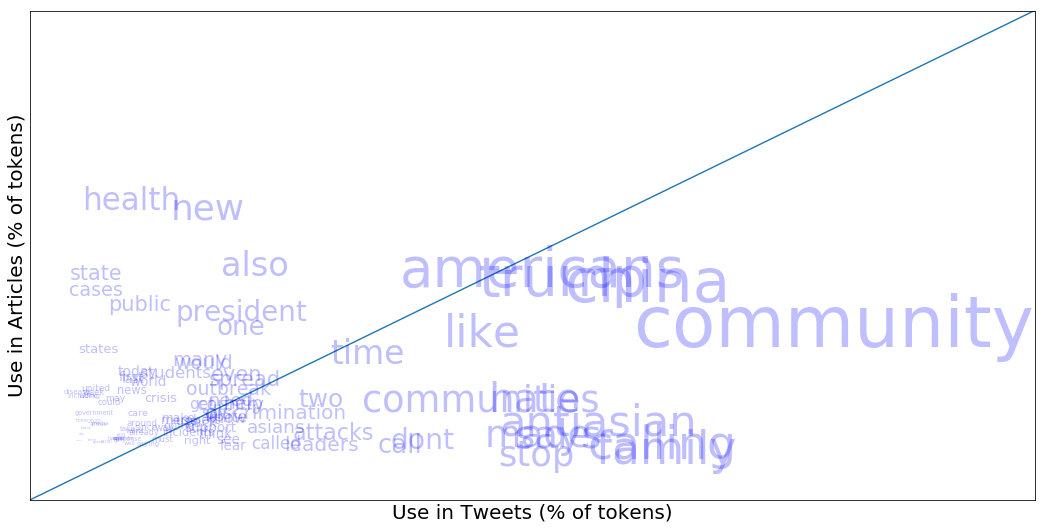

In [68]:
plot_shared_vocab(cdf[np.logical_and(cdf['Tweets_percent']>0.05, cdf['Articles_percent']>0.05)])

In [69]:
cdf[np.logical_and(cdf['Tweets_percent']>0.1, cdf['Articles_percent']>0.1)]

,word,Number of occurrences in Tweets,Number of occurrences in articles,Tweets_percent,Articles_percent
0,said,70,8864,0.157307,0.868373
1,people,436,7273,0.979797,0.712508
2,chinese,735,4806,1.651723,0.470826
3,us,248,4672,0.557316,0.457698
4,—,53,4612,0.119104,0.451820
5,health,49,4540,0.110115,0.444767
6,new,86,4413,0.193263,0.432325
7,americans,248,3466,0.557316,0.339551
8,also,109,3542,0.244949,0.346996
9,trump,258,3332,0.579788,0.326423


- "trump" and "president" both appear on the list
- "hate" and "discrimination" both appear as well

## Sentiment Analysis

In [71]:
sid = SentimentIntensityAnalyzer()

#### Tweets

In [72]:
tweet_sid_scores=[]

for tweet in all_time:
    scores = sid.polarity_scores(tweet['text'])
    scores['text']=tweet['text']
    scores['date']=tweet['date']
    tweet_sid_scores.append(scores)

In [73]:
by_monthdate = {}
for tweet in tweet_sid_scores:
    ymd = tweet['date'][:10]
    try:
        by_monthdate[ymd].append(tweet['compound'])
    except:
        by_monthdate[ymd] = [tweet['compound']]

In [74]:
data_tweets = [{ 'date': y, 'avg_sent': sum(d)/len(d)}
        for y, d in by_monthdate.items() ]

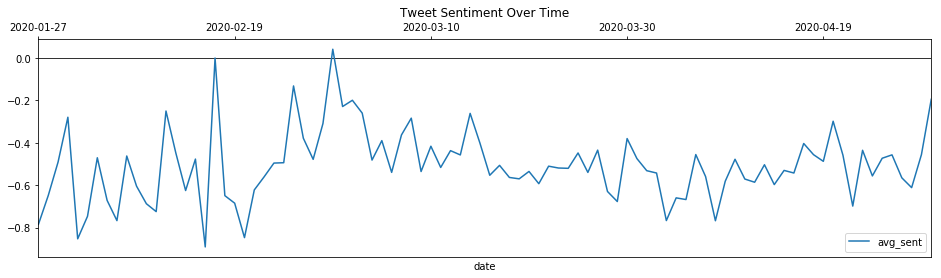

In [75]:
fig,ax = plt.subplots(figsize=(16,4))
plt.title('Tweet Sentiment Over Time')
p=pd.DataFrame(data_tweets)
p.set_index('date',inplace=True)
ax.xaxis.tick_top()
ax.axhline(y=0, xmin=0.0, xmax=1.0, color='black', linewidth=0.8)

p.sort_index().plot(ax=ax)

In [90]:
for item in ['ching chong','chink']:
    print(item,sid.lexicon.get(item))

ching chong None
chink None


*interesting how there's no score for these derogatory terms*

#### Articles

In [76]:
article_sid_scores=[]

for article in corp_all:
    filename = article['Filename']
    text = open('data/text_all/{}'.format(filename)).read()
    article['text']=text
    scores = sid.polarity_scores(article['text'])
    scores['text']=article['text']
    scores['date']=article['Date']
    article_sid_scores.append(scores)

In [77]:
a_by_monthdate = {}
for article in article_sid_scores:
    ymd = article['date']
    try:
        a_by_monthdate[ymd].append(article['compound'])
    except:
        a_by_monthdate[ymd] = [article['compound']]

In [78]:
data_articles = [{ 'date': y, 'avg_sent': sum(d)/len(d)}
        for y, d in a_by_monthdate.items() ]

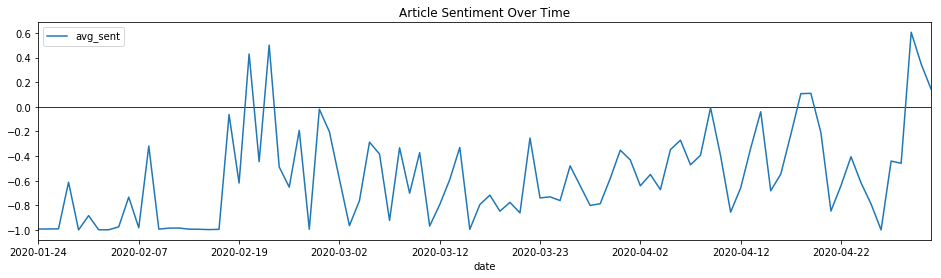

In [79]:
fig,ax = plt.subplots(figsize=(16,4))
plt.title('Article Sentiment Over Time')
p=pd.DataFrame(data_articles)
p.set_index('date',inplace=True)
ax.axhline(y=0, xmin=0.0, xmax=1.0, color='black', linewidth=0.8)

p.sort_index().plot(ax=ax)

In [80]:
t = pd.DataFrame(data_tweets)
a = pd.DataFrame(data_articles)
a.head()

,avg_sent,date
0,-0.612175,2020-01-31
1,-0.999300,2020-02-01
2,-0.990400,2020-01-29
3,-0.991900,2020-01-24
4,-0.991900,2020-01-25


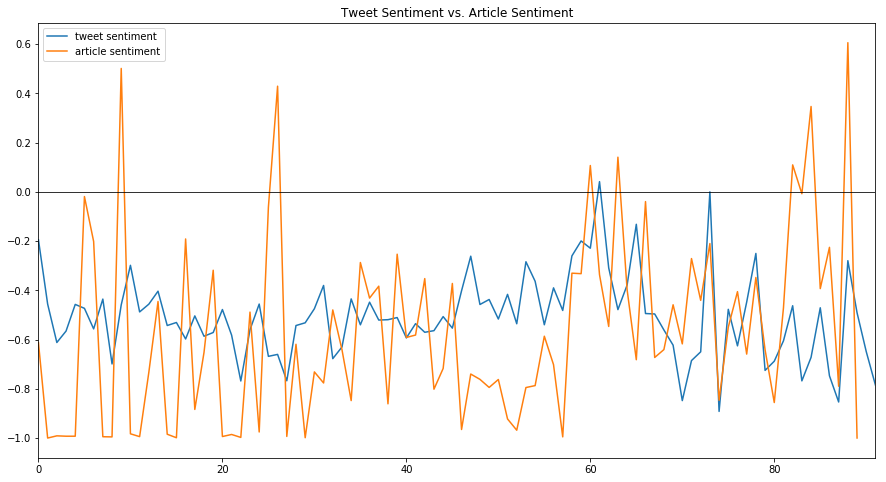

In [81]:
plt.rcParams["figure.figsize"] = (15,8)
ax = t.plot(label="tweets")
a.plot(ax=ax, label = 'articles')
plt.title('Tweet Sentiment vs. Article Sentiment')
plt.gca().legend(('tweet sentiment','article sentiment'))
ax.axhline(y=0, xmin=0.0, xmax=1.0, color='black', linewidth=0.8)

In [82]:
stripped_tweets_wfreq.most_common(50)

[('chinese', 735),
 ('people', 436),
 ('community', 389),
 ('im', 317),
 ('family', 308),
 ('calling', 306),
 ('china', 299),
 ('antiasian', 275),
 ('trump', 258),
 ('says', 256),
 ('americans', 248),
 ('us', 248),
 ('made', 246),
 ('stop', 245),
 ('hate', 244),
 ('fears', 241),
 ('texas', 233),
 ('like', 219),
 ('communities', 218),
 ('stab', 217),
 ('grocery', 217),
 ('shopped', 213),
 ('dont', 190),
 ('via', 185),
 ('call', 179),
 ('amid', 173),
 ('time', 163),
 ('attacks', 147),
 ('two', 141),
 ('leaders', 141),
 ('doctor', 125),
 ('discrimination', 119),
 ('called', 119),
 ('asians', 119),
 ('please', 113),
 ('front', 112),
 ('youre', 111),
 ('lines', 111),
 ('also', 109),
 ('wars', 104),
 ('spread', 104),
 ('help', 103),
 ('president', 102),
 ('one', 102),
 ('even', 100),
 ('fear', 98),
 ('towards', 97),
 ('need', 97),
 ('rise', 97),
 ('country', 97)]

## Comparing key word frequency over time

In [84]:
s_all_tokens_dist.most_common(50)

[('said', 8864),
 ('people', 7273),
 ('the', 7060),
 ('chinese', 4806),
 ('us', 4672),
 ('—', 4612),
 ('health', 4540),
 ('new', 4413),
 ('also', 3542),
 ('americans', 3466),
 ('state', 3434),
 ('trump', 3332),
 ('china', 3259),
 ('cases', 3179),
 ('public', 2963),
 ('president', 2846),
 ('a', 2795),
 ('community', 2627),
 ('one', 2618),
 ('like', 2522),
 ('illinois', 2399),
 ('states', 2280),
 ('officials', 2248),
 ('chicago', 2218),
 ('time', 2207),
 ('many', 2120),
 ('would', 2080),
 ('county', 2066),
 ('deaths', 1975),
 ('pm', 1956),
 ('today', 1952),
 ('students', 1926),
 ('even', 1900),
 ('first', 1862),
 ('last', 1831),
 ('spread', 1817),
 ('world', 1795),
 ('university', 1738),
 ('united', 1696),
 ('outbreak', 1674),
 ('news', 1664),
 ('disease', 1638),
 ('week', 1630),
 ('work', 1582),
 ('including', 1581),
 ('march', 1578),
 ('city', 1548),
 ('crisis', 1540),
 ('may', 1535),
 ('two', 1519)]

Compare on these keywords: 'chinese', 'community', 'health', 'public', 'trump', 'chicago', 'deaths', 'illinois', 'students', 'hate', 'crisis'

Article Keyword Frequency by Month


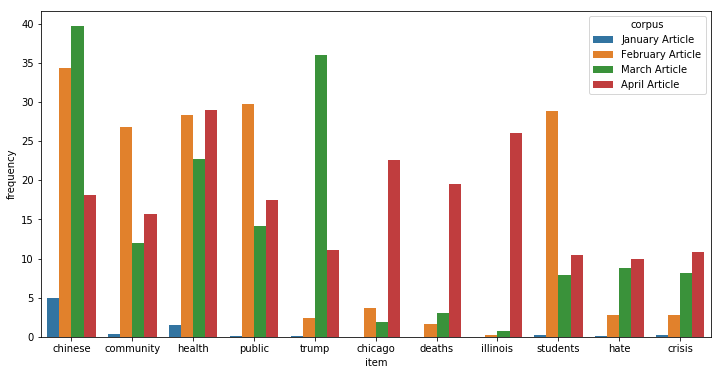

In [85]:
comparison_data = compare_items(jan_word_dist, feb_word_dist,mar_word_dist,apr_word_dist,['chinese', 'community', 'health', 'public', 'trump', 'chicago', 'deaths', 'illinois', 'students', 'hate', 'crisis'])
print('Article Keyword Frequency by Month')
comparison_plot(comparison_data, label1= "January Article", label2= "February Article", label3= "March Article", label4= "April Article")

## Collocation

**Articles**

In [86]:
article_colls = Counter()
article_colls.update(collocates(all_tokens, 'health',win=[5,5]))

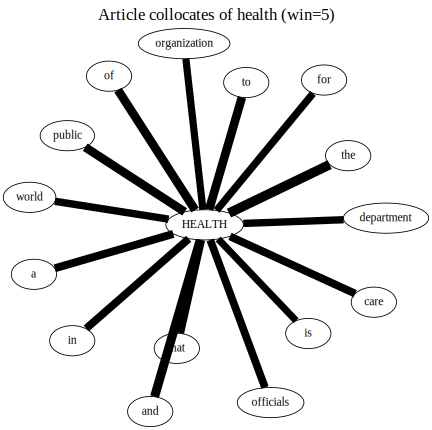

In [87]:
plot_collocates('health', article_colls, num=15, threshold=2,
                title='Article collocates of health (win=5)')

**Tweets**

In [88]:
tweet_colls = Counter()
tweet_colls.update(collocates(stripped_tweets_tokens, 'health',win=[5,5]))

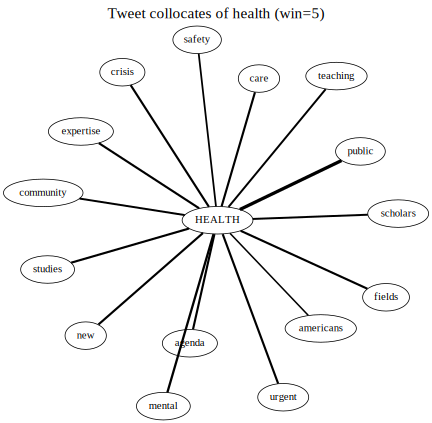

In [89]:
plot_collocates('health', tweet_colls, num=15, threshold=2,
                title='Tweet collocates of health (win=5)')

In [92]:
tweet_colls = Counter()
tweet_colls.update(collocates(all_tokens, 'chicago',win=[5,5]))

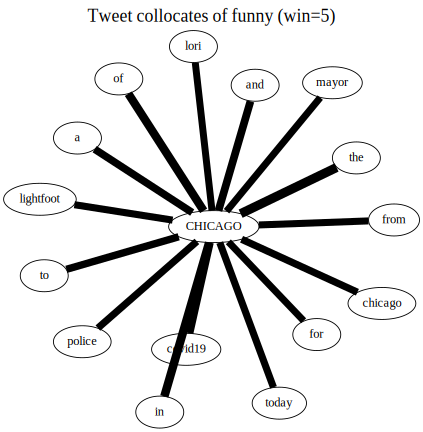

In [93]:
plot_collocates('chicago', tweet_colls, num=15, threshold=2,
                title='Tweet collocates of funny (win=5)')